In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
# Diabetes Dataset (Instructor-Led):
# Regression Task:
# •	Objective: Predict the quantitative progression of diabetes.
# •	Steps:
# 1.	Dataset Preparation:
# 	Load the Diabetes Dataset using load_diabetes() from sklearn.datasets.
# 	Preprocess the data using StandardScaler.
# 	Split the data into training and test sets using train_test_split.
# 	Convert the data into PyTorch tensors.
# 2.	Neural Network Definition:
# 	Build a feedforward neural network:
# 	Input layer size = number of features (10).
# 	Two hidden layers with 64 and 32 units, using ReLU activation.
# 	Output layer with one neuron for regression.
# 3.	Training:
# 	Use MSELoss as the loss function and Adam as the optimizer.
# 	Train for 100 epochs, logging the loss every 10 epochs.
# 4.	Evaluation:
# 	Calculate mean squared error and R-squared.
# 	Visualize predictions vs. true values using matplotlib.


Epoch [10/100], Loss: 27500.1250
Epoch [20/100], Loss: 18069.3789
Epoch [30/100], Loss: 5893.7969
Epoch [40/100], Loss: 5054.4634
Epoch [50/100], Loss: 3901.7039
Epoch [60/100], Loss: 3307.3137
Epoch [70/100], Loss: 3067.1707
Epoch [80/100], Loss: 2942.8088
Epoch [90/100], Loss: 2846.0972
Epoch [100/100], Loss: 2781.4414
Mean Squared Error: 3018.8640
R-squared: 0.4302


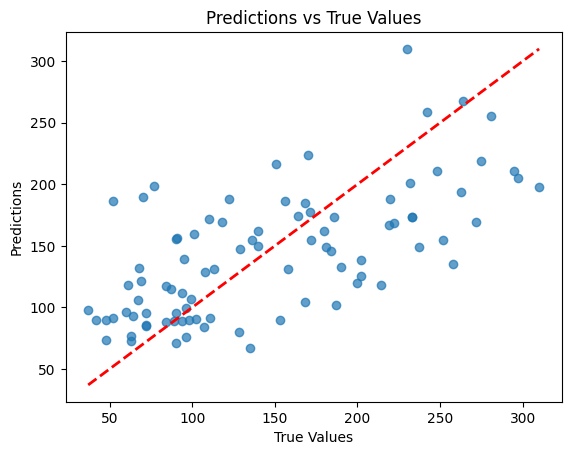

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Dataset Preparation
# Load dataset
data = load_diabetes()
X, y = data.data, data.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 2. Neural Network Definition
class DiabetesRegressor(nn.Module):
    def __init__(self):
        super(DiabetesRegressor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(10, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the model
model = DiabetesRegressor()

# 3. Training
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log the loss
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 4. Evaluation
# Make predictions
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

# Calculate metrics
y_pred_np = y_pred.numpy()
y_test_np = y_test_tensor.numpy()

mse = mean_squared_error(y_test_np, y_pred_np)
r2 = r2_score(y_test_np, y_pred_np)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Visualization
plt.scatter(y_test_np, y_pred_np, alpha=0.7)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predictions vs True Values")
plt.show()


In [1]:
# Classification Task:
# • Objective: Classify patients into "low progression" or "high progression" based on a
# threshold (e.g., median progression value).
# • Steps:
# 1. Dataset Preparation:
# ▪ Use the same Diabetes Dataset but create binary labels:
# ▪ Label patients as 1 (high progression) or 0 (low progression).
# ▪ Use the median progression value as the threshold.
# ▪ Split the data into training and test sets and preprocess it.
# ▪ Convert the data into PyTorch tensors.
# 2. Neural Network Definition:
# ▪ Build a feedforward neural network:
# ▪ Input layer size = number of features (10).
# ▪ Two hidden layers with 64 and 32 units, using ReLU activation.
# ▪ Output layer with 2 neurons for binary classification (softmax
# activation).
# 3. Training:
# ▪ Use CrossEntropyLoss as the loss function and Adam as the optimizer.
# ▪ Train for 100 epochs, logging the loss every 10 epochs.
# 4. Evaluation:
# ▪ Calculate metrics such as accuracy, precision, recall, and F1-score.
# ▪ Generate a confusion matrix and visualize it

Epoch [10/100], Loss: 0.4726
Epoch [20/100], Loss: 0.4141
Epoch [30/100], Loss: 0.3572
Epoch [40/100], Loss: 0.2919
Epoch [50/100], Loss: 0.2140
Epoch [60/100], Loss: 0.1409
Epoch [70/100], Loss: 0.0786
Epoch [80/100], Loss: 0.0419
Epoch [90/100], Loss: 0.0218
Epoch [100/100], Loss: 0.0120
Accuracy: 0.7416
Precision: 0.7073
Recall: 0.7250
F1 Score: 0.7160


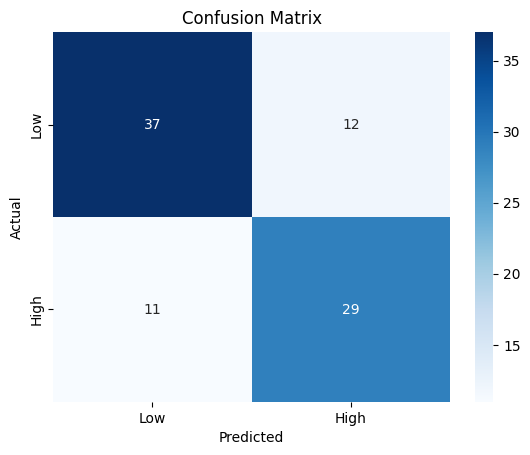

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Dataset Preparation
# Load dataset
data = load_diabetes()
X, y = data.data, data.target

# Create binary labels
threshold = np.median(y)
y_binary = (y > threshold).astype(int)

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 2. Neural Network Definition
class DiabetesClassifier(nn.Module):
    def __init__(self):
        super(DiabetesClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(10, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the model
model = DiabetesClassifier()

# 3. Training
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log the loss
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 4. Evaluation
# Make predictions
model.eval()
with torch.no_grad():
    y_pred_logits = model(X_test_tensor)
    y_pred = torch.argmax(y_pred_logits, axis=1).numpy()

# Calculate metrics
y_test_np = y_test_tensor.numpy()
accuracy = accuracy_score(y_test_np, y_pred)
precision = precision_score(y_test_np, y_pred)
recall = recall_score(y_test_np, y_pred)
f1 = f1_score(y_test_np, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_np, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
